**Chapter 5 – Classification**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/hanchen92/handson-ml3/blob/main/05_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/hanchen92/handson-ml3/main/05_classification.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Just like in the previous chapter, let's define the default font sizes to make the figures prettier:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/classification` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', as_frame=False)

In [6]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
X.shape

(70000, 784)

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
y.shape

(70000,)

In [12]:
28 * 28

784

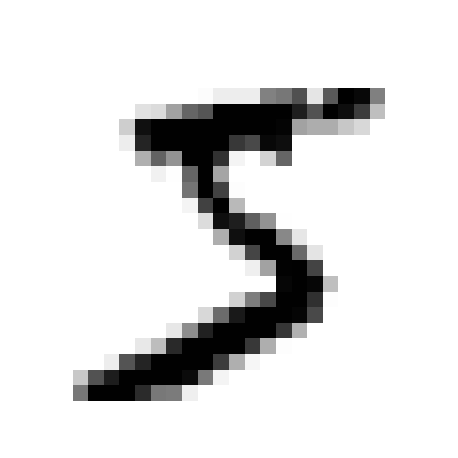

In [13]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

In [14]:
y[0]

'5'

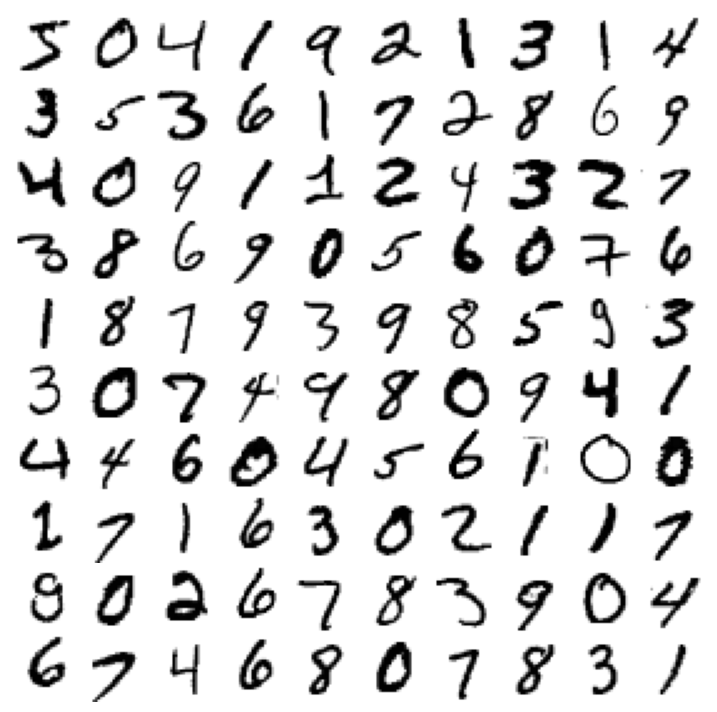

In [15]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#X_train, X_test, y_train, y_test = X[:5000], X[60000:], y[:5000], y[60000:]

# Training models

## Logistic model

In [17]:
from sklearn.linear_model import LogisticRegression
logis_class = LogisticRegression(random_state=0, max_iter=500).fit(X_train, y_train)
y_train_pred = logis_class.predict(X_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


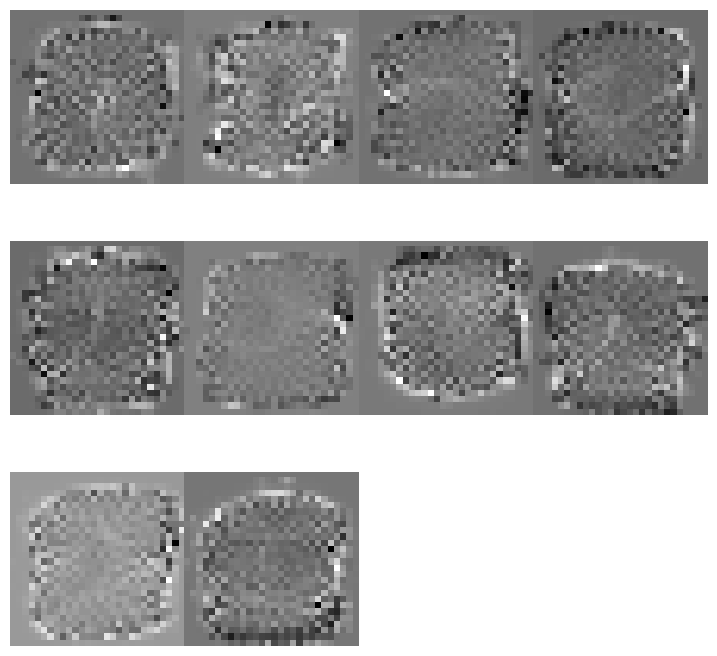

In [18]:
tmp_class_num =  logis_class.coef_.shape[0]
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for i in range(tmp_class_num):
    plt.subplot(3, 4, i + 1)
    plot_digit(logis_class.coef_[i,:])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

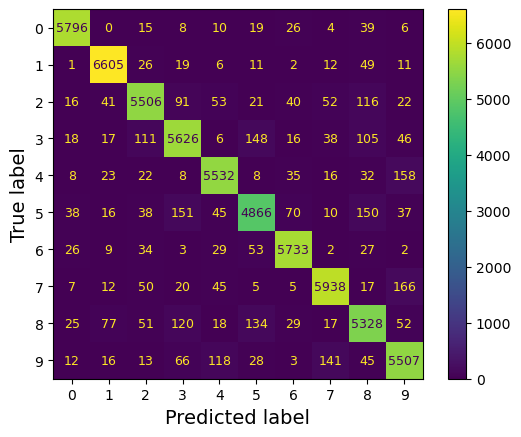

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [20]:
np.mean(y_train==y_train_pred)

0.9406166666666667

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_cv_pred = cross_val_predict(logis_class, X_train, y_train, cv=3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

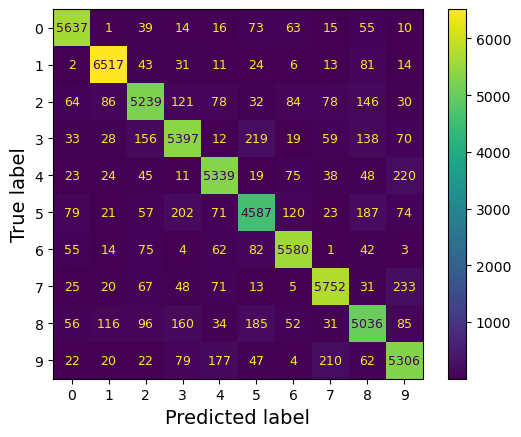

In [22]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_cv_pred)
plt.show()

In [23]:
np.mean(y_train==y_train_cv_pred)

0.9065

In [24]:
from sklearn.model_selection import cross_val_score

tmp_cv_score = cross_val_score(logis_class, X_train, y_train, cv=3, scoring="accuracy")
tmp_cv_score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.90495, 0.9071 , 0.90745])

In [25]:
tmp_logistic_cv_score_mean = np.mean(tmp_cv_score)

## Logistic Model with Lasso 

In [26]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

logis_class_lasso = LogisticRegressionCV(random_state=0, n_jobs = 5, penalty = 'l1', solver = 'saga', cv=3, scoring='accuracy').fit(X_train_scaled, y_train)
y_train_pred = logis_class_lasso.predict(X_train_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


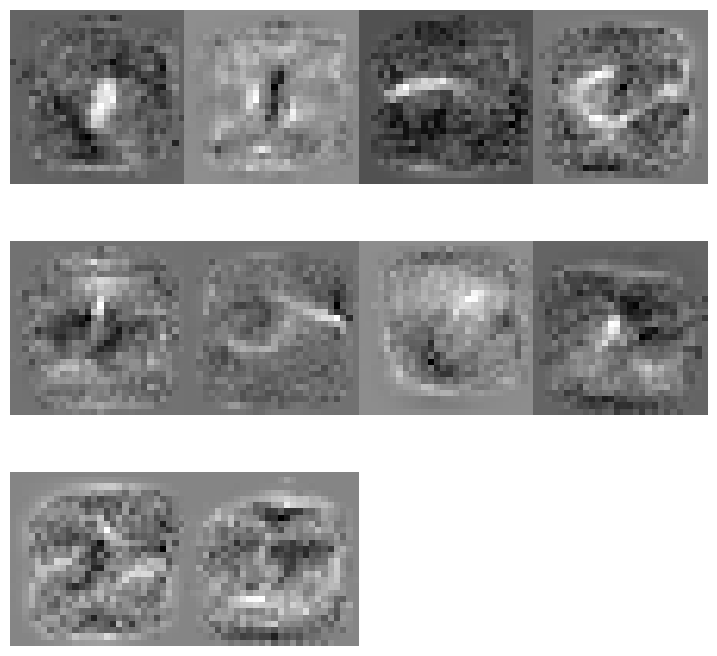

In [27]:
tmp_class_num =  logis_class_lasso.coef_.shape[0]
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for i in range(tmp_class_num):
    plt.subplot(3, 4, i + 1)
    plot_digit(logis_class_lasso.coef_[i,:])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

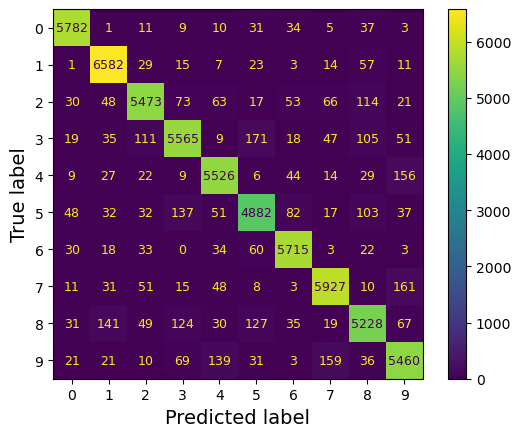

In [28]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [29]:
np.mean(y_train==y_train_pred)

0.9356666666666666

In [30]:
cv_score_avg=dict()
keys_list = logis_class_lasso.scores_.keys()
for tmp_key in keys_list:
    cv_score_avg[tmp_key] = logis_class_lasso.scores_[tmp_key].mean(axis=0)
#logis_class_lasso.scores_
cv_score_avg2 = np.array(list(cv_score_avg.values())).mean(axis=0)

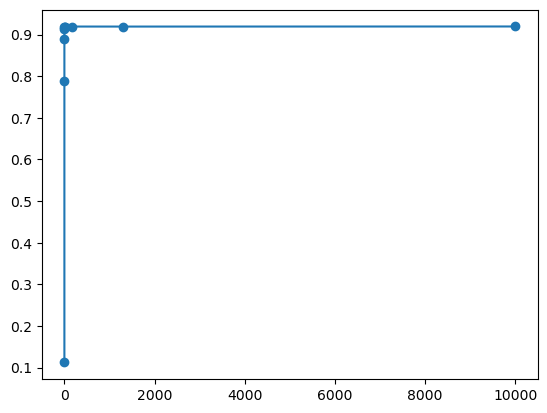

In [31]:
plt.plot(logis_class_lasso.Cs_,cv_score_avg2,'o-')

In [32]:
cv_score_avg2[np.where(cv_score_avg2==np.max(cv_score_avg2))[0]]

array([0.91953333])

In [33]:
tmp_logistic_lasso_cv_score_mean = cv_score_avg2[np.where(cv_score_avg2==np.max(cv_score_avg2))[0]]

## Linear Discriminant Analysis(LDA)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

LDA_class = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_train_pred = LDA_class.predict(X_train)

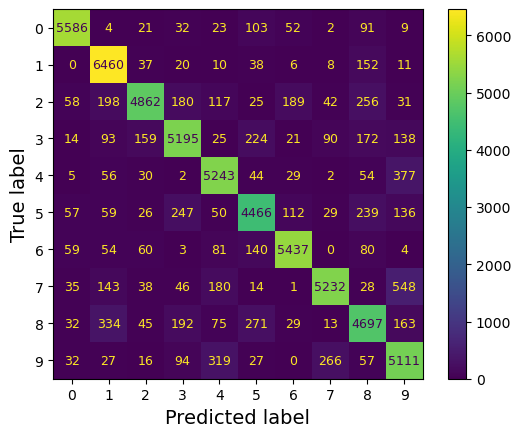

In [35]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [36]:
np.mean(y_train==y_train_pred)

0.8714833333333334

In [37]:
tmp_cv_score = cross_val_score(LDA_class, X_train, y_train, cv=3, scoring="accuracy")
tmp_cv_score

array([0.8584, 0.8615, 0.8673])

In [38]:
tmp_lda_cv_score_mean = np.mean(tmp_cv_score)

## Quadratic Discriminant Analysis(QDA)

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

QDA_class = QuadraticDiscriminantAnalysis(reg_param=0.05).fit(X_train, y_train)
y_train_pred = QDA_class.predict(X_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


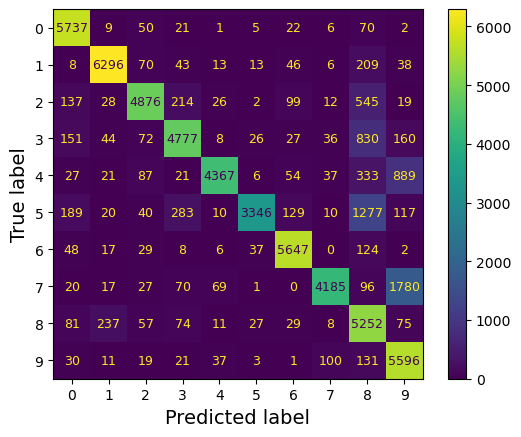

In [40]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [41]:
np.mean(y_train==y_train_pred)

0.83465

In [42]:
tmp_cv_score = cross_val_score(QDA_class, X_train, y_train, cv=3, scoring="accuracy")
tmp_cv_score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([0.79735, 0.81285, 0.8074 ])

In [43]:
tmp_qda_cv_score_mean = np.mean(tmp_cv_score)

## Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB


GNB_class = GaussianNB().fit(X_train, y_train)
y_train_pred = GNB_class.predict(X_train)

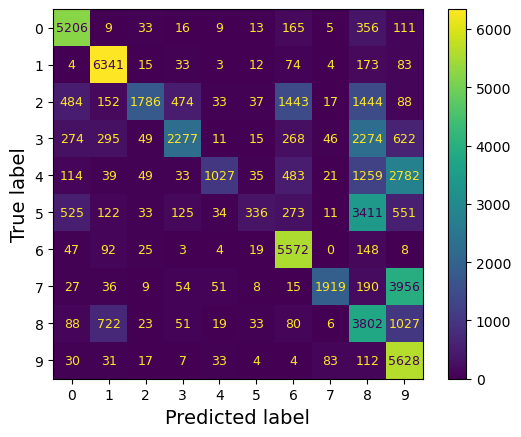

In [45]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [46]:
np.mean(y_train==y_train_pred)

0.5649

In [47]:
tmp_cv_score = cross_val_score(GNB_class, X_train, y_train, cv=3, scoring="accuracy")
tmp_cv_score

array([0.5592, 0.5603, 0.5572])

In [48]:
tmp_NBGauss_cv_score_mean = np.mean(tmp_cv_score)

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

Tree_class = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_train_pred = Tree_class.predict(X_train)

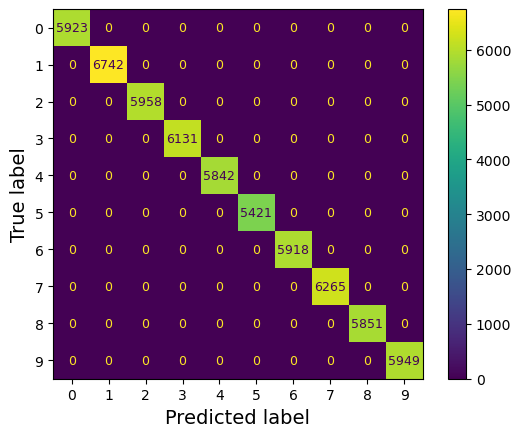

In [50]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [51]:
np.mean(y_train==y_train_pred)

1.0

In [52]:
tmp_cv_score = cross_val_score(Tree_class, X_train, y_train, cv=3, scoring="accuracy")
tmp_cv_score

array([0.85835, 0.8597 , 0.862  ])

In [53]:
tmp_tree_cv_score_mean = np.mean(tmp_cv_score)

In [54]:
tmp_path  = Tree_class.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = tmp_path.ccp_alphas, tmp_path.impurities

In [55]:
tmp_cpp_len = len(ccp_alphas)
tmp_step = int(np.floor(tmp_cpp_len/(20)))
tmp_ccp_alpha = ccp_alphas[0:tmp_cpp_len:tmp_step]
tmp_all_cv_acc = []
for i, tmp_alpha in enumerate(tmp_ccp_alpha):
    if i%5==0:
        print(i)
    tmp_tree_reg = DecisionTreeClassifier(random_state=0, ccp_alpha = tmp_alpha)
    tmp_all_cv_acc.append(np.mean(cross_val_score(tmp_tree_reg, X_train, y_train, cv=3, scoring="accuracy")))

0
5
10
15
20


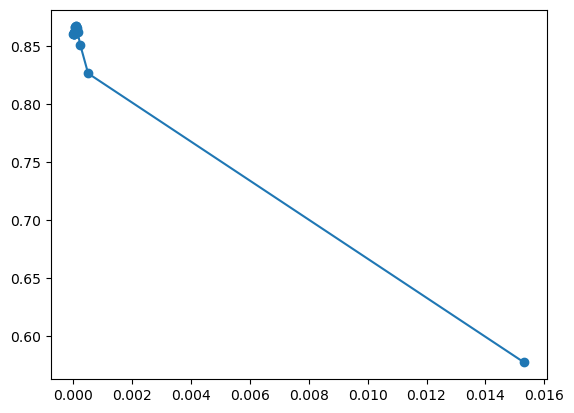

In [56]:
plt.plot(tmp_ccp_alpha,tmp_all_cv_acc,'o-')

In [57]:
np.where(tmp_all_cv_acc==np.max(tmp_all_cv_acc))[0][0]

14

In [58]:
tmp_alpha = tmp_ccp_alpha[np.where(tmp_all_cv_acc==np.max(tmp_all_cv_acc))[0][0]]
Tree_class2 = DecisionTreeClassifier(random_state=0, ccp_alpha = tmp_alpha).fit(X_train, y_train)
y_train_pred = Tree_class2.predict(X_train)

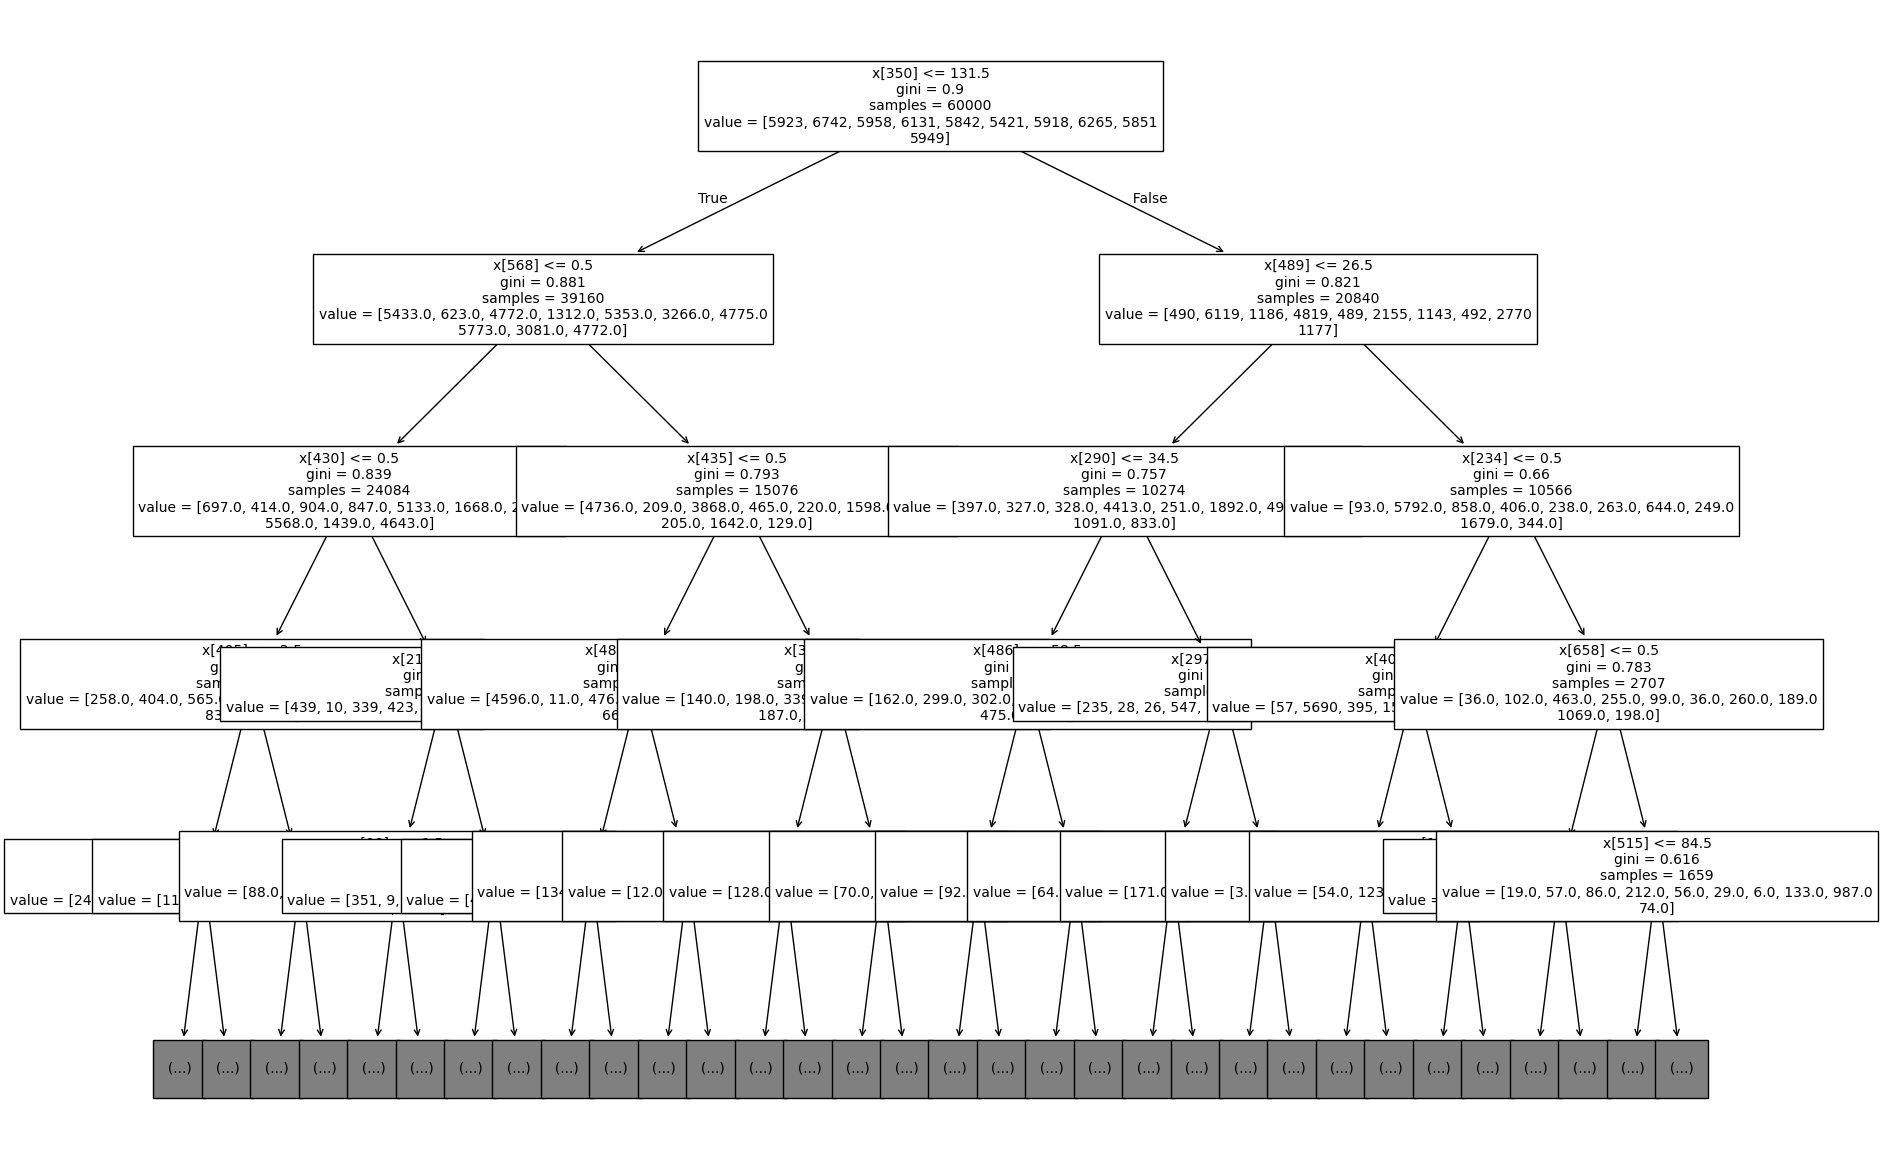

In [59]:
from sklearn.tree import plot_tree

fig, axes= plt.subplots(1, 1, figsize=(20, 15))
plot_tree(Tree_class2, max_depth=4,fontsize=10)
plt.show()

In [60]:
np.max(tmp_all_cv_acc)

0.8666833333333334

In [61]:
tmp_tree_adjust_cv_score_mean = np.max(tmp_all_cv_acc)

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier


RFC_class = RandomForestClassifier(random_state=0, n_estimators = 100, verbose = 1).fit(X_train, y_train)
y_train_pred = RFC_class.predict(X_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


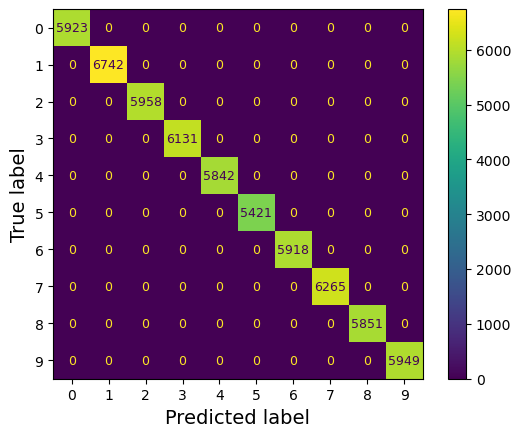

In [63]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [64]:
np.mean(y_train==y_train_pred)

1.0

In [65]:
tmp_cv_score = cross_val_score(RFC_class, X_train, y_train, cv=3, scoring="accuracy")
tmp_cv_score

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


array([0.96465, 0.96225, 0.9659 ])

In [66]:
tmp_RF_cv_score_mean = np.mean(tmp_cv_score)

In [67]:
feature_importances = RFC_class.feature_importances_
feature_importances.round(2)

sorted(zip(feature_importances,
           np.arange((X_train.shape[1]))),
           reverse=True)

[(0.010437113662093416, 378),
 (0.010059999504401234, 433),
 (0.008391255109723644, 350),
 (0.008114961476686553, 405),
 (0.008096867069272894, 569),
 (0.00796217674144147, 409),
 (0.007483223833112436, 461),
 (0.007477148690748894, 406),
 (0.00744829598088821, 318),
 (0.007024624455806562, 542),
 (0.006809744119143895, 429),
 (0.0065288929641846224, 489),
 (0.006454393650641983, 210),
 (0.006329444343023769, 377),
 (0.0062733592378042225, 291),
 (0.006257859270298404, 155),
 (0.006201144796049563, 375),
 (0.006130207177579708, 347),
 (0.006101888441893037, 437),
 (0.006095781472381492, 515),
 (0.006029436470382257, 154),
 (0.0060269388658946085, 211),
 (0.005998110236589893, 543),
 (0.005914854255437758, 488),
 (0.0056957589482654865, 346),
 (0.005601685633630667, 381),
 (0.005580702048484224, 401),
 (0.005541017585045751, 514),
 (0.005486382169448839, 407),
 (0.0054706463982416385, 319),
 (0.005328760738000697, 379),
 (0.005249323038858572, 354),
 (0.005204189875056696, 212),
 (0.005

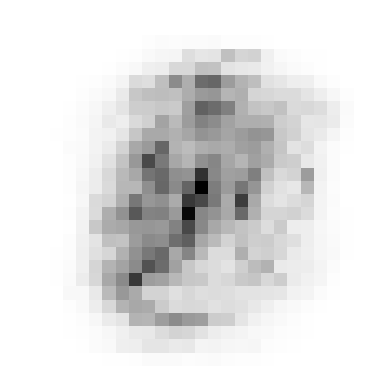

In [68]:
plot_digit(feature_importances)

## Graident Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

boost_class = GradientBoostingClassifier(n_estimators=250, max_depth=3, random_state=0, verbose = 1).fit(X_train, y_train)
y_train_pred = boost_class.predict(X_train)

      Iter       Train Loss   Remaining Time 
         1           1.9103           45.09m
         2           1.6843           44.77m
         3           1.5170           44.56m
         4           1.3837           44.30m
         5           1.2679           44.16m
         6           1.1712           44.00m
         7           1.0834           43.90m
         8           1.0090           43.73m
         9           0.9433           43.53m
        10           0.8849           43.36m
        20           0.5524           41.57m
        30           0.4018           39.79m
        40           0.3203           38.02m
        50           0.2676           36.22m
        60           0.2320           34.32m
        70           0.2058           32.43m
        80           0.1848           30.56m
        90           0.1681           28.73m
       100           0.1601           26.89m
       200           0.0810            8.91m


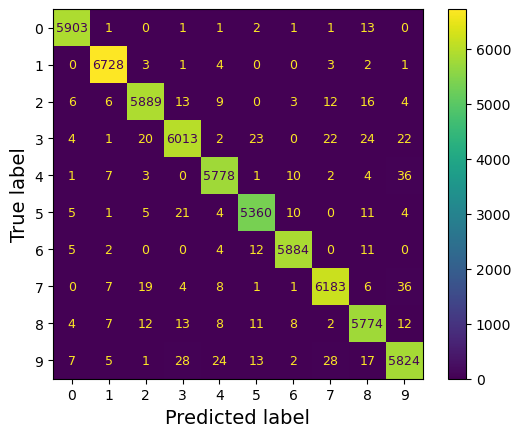

In [70]:
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [71]:
np.mean(y_train==y_train_pred)

0.9889333333333333

In [72]:
tmp_cv_score = cross_val_score(boost_class, X_train, y_train, cv=3, scoring="accuracy")
tmp_cv_score

      Iter       Train Loss   Remaining Time 
         1           1.9085           48.11m
         2           1.6816           47.92m
         3           1.5133           47.69m
         4           1.3798           47.45m
         5           1.2642           47.11m
         6           1.1660           46.87m
         7           1.0804           46.61m
         8           1.0067           46.36m
         9           0.9415           46.11m
        10           0.8831           45.85m
        20           0.5467           43.82m
        30           0.3985           41.96m
        40           0.3136           40.04m
        50           0.2622           38.08m
        60           0.2263           36.12m
        70           0.1990           34.21m
        80           0.1782           32.28m
        90           0.1619           30.36m
       100           0.1484           28.47m
       200           0.0707            9.65m
      Iter       Train Loss   Remaining Time 
        

array([0.95785, 0.9571 , 0.96025])

In [73]:
tmp_GB_cv_score_mean = np.mean(tmp_cv_score)

In [75]:
import pandas as pd

In [77]:
all_methods = ["Logistic","Logistic with Lasso","LDA","QDA","NBGauss","Tree","Tree with Adjust","Random Forest","Boosting"]
all_rmse_cv = [tmp_logistic_cv_score_mean,
               tmp_logistic_lasso_cv_score_mean[0],
               tmp_lda_cv_score_mean,
               tmp_qda_cv_score_mean,
               tmp_NBGauss_cv_score_mean,
               tmp_tree_cv_score_mean,
               tmp_tree_adjust_cv_score_mean,
               tmp_RF_cv_score_mean,
               tmp_GB_cv_score_mean]
pd.DataFrame({"method": all_methods,"CV Accuracy": all_rmse_cv})

,method,CV Accuracy
0,Logistic,0.906500
1,Logistic with Lasso,0.919533
2,LDA,0.862400
3,QDA,0.805867
4,NBGauss,0.558900
5,Tree,0.860017
6,Tree with Adjust,0.866683
7,Random Forest,0.964267
8,Boosting,0.958400


# Training a Binary Classifier

In [78]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [79]:
logis_class_binary = LogisticRegression(random_state=0, max_iter=500).fit(X_train, y_train_5)
y_train_pred = logis_class_binary.predict(X_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
logis_class_binary.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [81]:
from sklearn.model_selection import cross_val_score

cross_val_score(logis_class_binary, X_train, y_train_5, cv=3, scoring="accuracy")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.97405, 0.97215, 0.9723 ])

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(logis_class_binary)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.97405


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.97215
0.9723


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [84]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### Confusion Matrix

In [85]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(logis_class_binary, X_train, y_train_5, cv=3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53984,   595],
       [ 1035,  4386]], dtype=int64)

In [87]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall

In [88]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8805460750853242

In [89]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8805460750853242

In [90]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.8090758162700609

In [91]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.8090758162700609

In [92]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.8432993655066333

In [93]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.8432993655066333

### Precision/Recall Trade-off

In [94]:
y_scores = logis_class_binary.predict_proba([some_digit])
y_scores

array([[0.16614378, 0.83385622]])

In [95]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [96]:
y_some_digit_pred

array([[ True,  True]])

In [97]:
# extra code – just shows that y_scores > 0.5 produces the same result as
#              calling predict()
y_scores > 0.5

array([[False,  True]])

In [98]:
threshold = 0.5
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False,  True]])

In [99]:
y_scores = cross_val_predict(logis_class_binary, X_train, y_train_5, cv=3,
                             method="predict_proba")[:,1]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [100]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

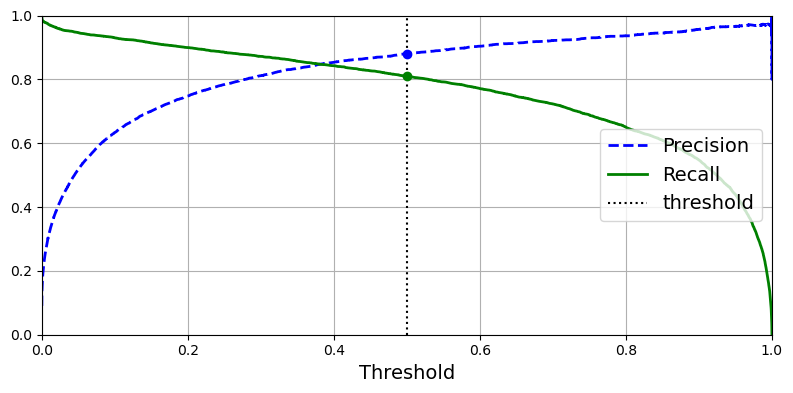

In [101]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

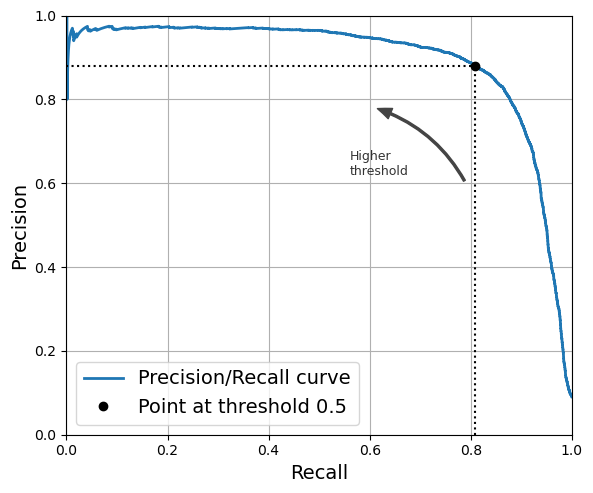

In [102]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 0.5")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [103]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

0.5828205031925188

In [104]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [105]:
precision_score(y_train_5, y_train_pred_90)

0.9000213174163292

In [106]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.7788230953698579

### The ROC Curve

In [107]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

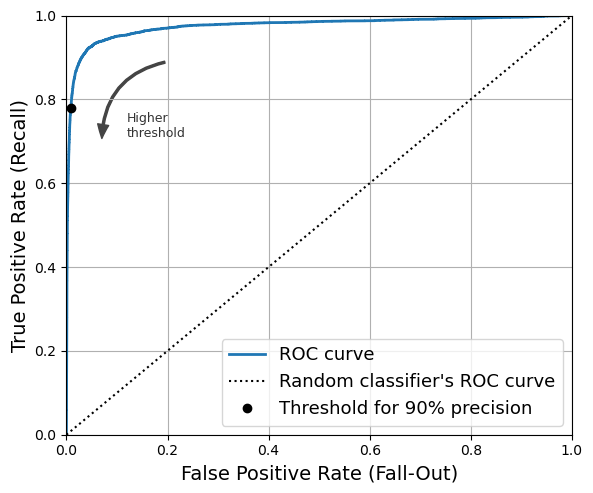

In [108]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [109]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9750677351137961

**Warning:** the following cell may take a few minutes to run.

In [110]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [111]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [112]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

These are _estimated probabilities_. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [113]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [114]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

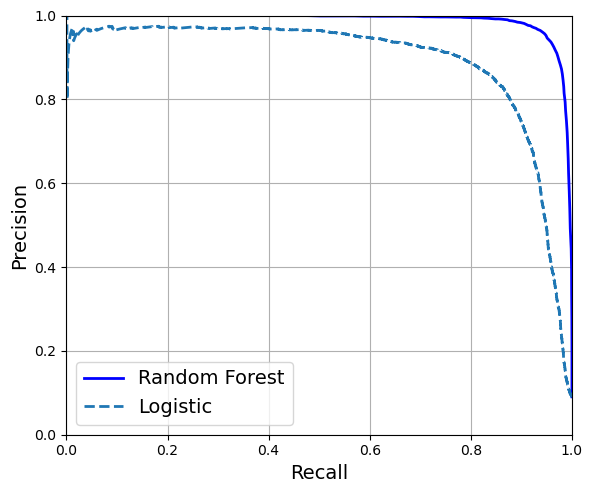

In [115]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="Logistic")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

We could use `cross_val_predict(forest_clf, X_train, y_train_5, cv=3)` to compute `y_train_pred_forest`, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [116]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [117]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [118]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [119]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

## Error Analysis

**Warning:** the following cell will take a few minutes to run:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

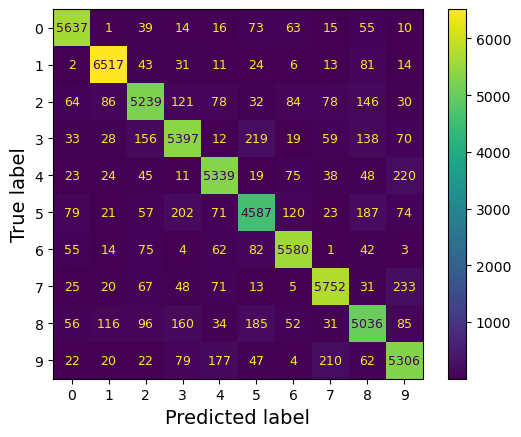

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(logis_class, X_train, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

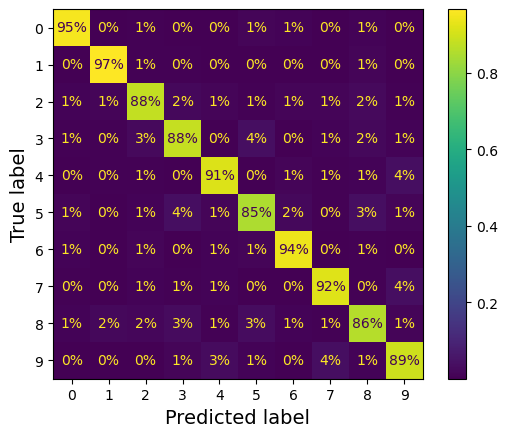

In [121]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

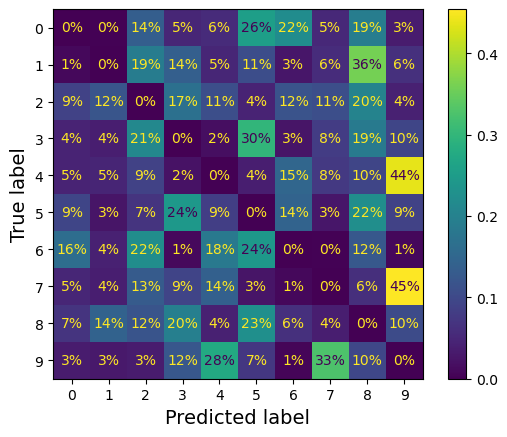

In [122]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

Let's put all plots in a couple of figures for the book:

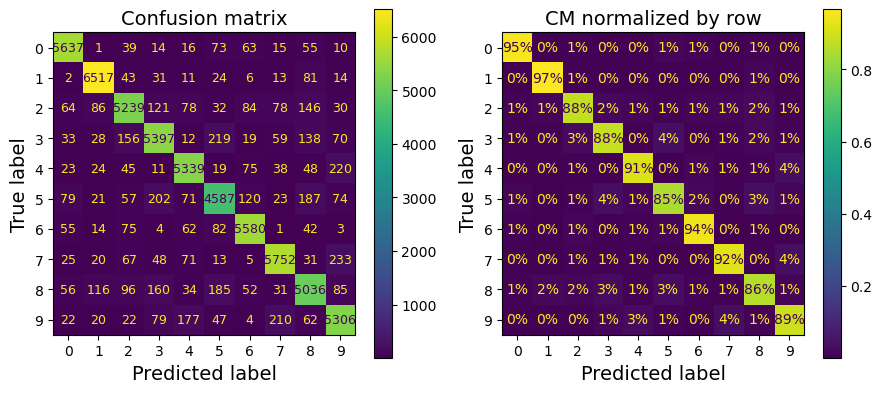

In [123]:
# extra code – this cell generates and saves Figure 3–9
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

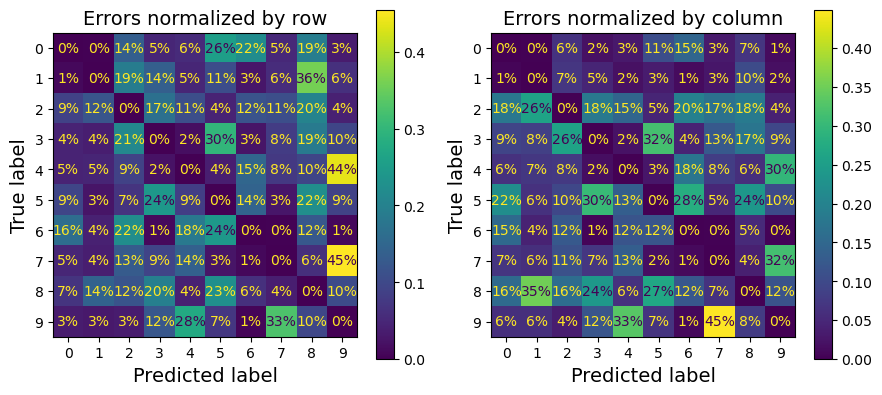

In [124]:
# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # make fonts great again

In [125]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

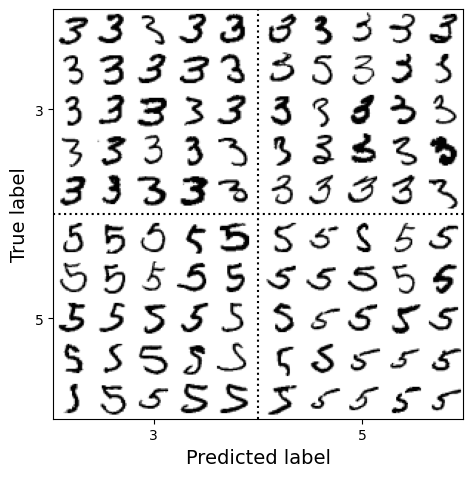

In [126]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

Note: there are several other ways you could code a plot like this one, but it's a bit hard to get the axis labels right:
* using [nested GridSpecs](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_nested.html)
* merging all the digits in each block into a single image (then using 2×2 subplots). For example:
    ```python
    X_aa[:25].reshape(5, 5, 28, 28).transpose(0, 2, 1, 3).reshape(5 * 28, 5 * 28)
    ```
* using [subfigures](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html) (since Matplotlib 3.4)